Image Classification : Daog vs Cat 

In [2]:
#https://www.kaggle.com/datasets/salader/dogs-vs-cats
#data set link, from here it can be download,it has two folder one is train dataset and other one is test data set
#both this folder contain dogs and cats images 

In [3]:
#importing necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from keras import Sequential 
from tensorflow import  keras
from keras.layers import *
# (Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout)

In [4]:
# generators
#to make it more efficient and not make it more complicate for the hardware, we will create a batch dataset 
#for training batch

df_train_batch =  keras.utils.image_dataset_from_directory(directory='D:/Programs/python/Data_Science/Image classification/train' ,
                                                                labels='inferred',label_mode='int',batch_size=32,image_size=(256,256))

#for test batch
df_test_batch = keras.utils.image_dataset_from_directory(directory='D:/Programs/python/Data_Science/Image classification/test', label_mode='int'
                                                           ,labels='inferred' ,batch_size= 32,image_size=(256,256))



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
#training dataset contain total 20000 and test dataset contain total 5000 files

In [6]:
#normalising the dataset
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label 

train_ds = df_train_batch.map(process)
test_ds = df_test_batch.map(process)

In [12]:
#CNN architechture
#in this first layer will contain 32 filter, 2nd filter contain 64 filter and 3rd will contain 128 filter

model = Sequential()
#first layer of cnn that contain 32 filter along with pooling layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

#second layer
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

#third layer
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)           

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
history_model  = model.fit(train_ds,epochs=10,validation_data=test_ds)
history_model

Epoch 1/10
625/625 [==============================] - 1767s 3s/step - loss: 0.5891 - accuracy: 0.6745 - val_loss: 0.5037 - val_accuracy: 0.7636
Epoch 2/10
625/625 [==============================] - 1717s 3s/step - loss: 0.4569 - accuracy: 0.7814 - val_loss: 0.4294 - val_accuracy: 0.7978
Epoch 3/10
625/625 [==============================] - 1822s 3s/step - loss: 0.3572 - accuracy: 0.8388 - val_loss: 0.4730 - val_accuracy: 0.7942
Epoch 4/10
625/625 [==============================] - 2489s 4s/step - loss: 0.2469 - accuracy: 0.8975 - val_loss: 0.5464 - val_accuracy: 0.8058
Epoch 5/10
625/625 [==============================] - 17645s 28s/step - loss: 0.1433 - accuracy: 0.9440 - val_loss: 0.7725 - val_accuracy: 0.7952
Epoch 6/10
625/625 [==============================] - 1749s 3s/step - loss: 0.0864 - accuracy: 0.9670 - val_loss: 0.9790 - val_accuracy: 0.7896
Epoch 7/10
625/625 [==============================] - 1638s 3s/step - loss: 0.0664 - accuracy: 0.9768 - val_loss: 0.9009 - val_accurac

In [40]:
#saving the model for the future preferences
model.save("classification_model.h5")

In [41]:
from keras.models import load_model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)           

In [42]:
train_model = load_model('classification_model.h5')
train_model
print("file loaded successfully")

file loaded successfully


In [51]:
#prediction
import cv2
load_img = cv2.imread('cat.jpeg')
load_img.shape

(140, 134, 3)

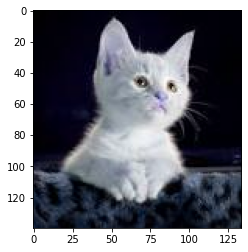

In [52]:
plt.imshow(load_img)

In [55]:
img = cv2.resize(load_img, (256,256))
img.shape

(256, 256, 3)

In [56]:
#expanding dimension
test_img = img.reshape(1,256,256,3)
test_img.shape

(1, 256, 256, 3)

In [57]:
train_model.predict(test_img)
#here zero signifies as cat 

array([[0.]], dtype=float32)

In [63]:
def predict_model(image ):
    if train_model.predict(image)==[0.]:
        print("Predicted images is Cat ")
    else:
        print("Predicted image is dog")


predict_model(test_img)     

Predicted images is Cat 


In [60]:
dog = cv2.imread('dog.jpeg')
dog.shape

(129, 102, 3)

In [61]:
dog = cv2.resize(dog,(256,256))
dog = dog.reshape(1,256,256,3)
dog.shape

(1, 256, 256, 3)

In [64]:
predict_model(dog)

Predicted image is dog


In [68]:
train_model.evaluate(df_test_batch)

157/157 [==============================] - 113s 703ms/step - loss: 370.5862 - accuracy: 0.7042


[370.5862121582031, 0.704200029373169]